In [33]:
import csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import colors



In [34]:
batting = pd.read_csv('Batting.csv')

print(batting.shape)

print(batting.tail())



(21927, 22)
        playerID  yearID  stint teamID lgID    G   AB   R   H  2B  ...  RBI  \
21922   zitoba01    2015      1    OAK   AL    3    0   0   0   0  ...    0   
21923  zobribe01    2015      1    OAK   AL   67  235  39  63  20  ...   33   
21924  zobribe01    2015      2    KCA   AL   59  232  37  66  16  ...   23   
21925  zuninmi01    2015      1    SEA   AL  112  350  28  61  11  ...   28   
21926   zychto01    2015      1    SEA   AL   13    0   0   0   0  ...    0   

       SB  CS  BB   SO  IBB  HBP  SH  SF  GIDP  
21922   0   0   0    0    0    0   0   0     0  
21923   1   1  33   26    2    0   0   3     5  
21924   2   3  29   30    1    1   0   2     3  
21925   0   1  21  132    0    5   8   2     6  
21926   0   0   0    0    0    0   0   0     0  

[5 rows x 22 columns]


<AxesSubplot:xlabel='AB', ylabel='H'>

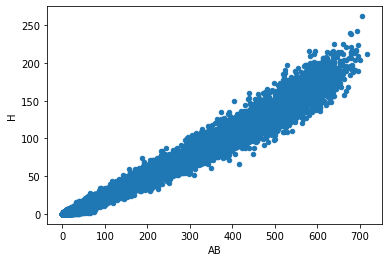

In [35]:
batting.plot.scatter("AB", "H")

In [36]:
x_train, x_test, y_train, y_test = train_test_split(batting.AB, batting.H, test_size = 0.2)
regr = LinearRegression()

In [37]:
regr.fit(np.array(x_train).reshape(-1,1), y_train)

LinearRegression()

In [38]:
preds = regr.predict(np.array(x_test).reshape(-1,1))

In [39]:
y_test.head()

13458    6
17555    0
4429     0
18625    0
1270     8
Name: H, dtype: int64

In [45]:
preds
# plt.scatter(preds)

array([ 6.11228576, -1.93603172, -0.54839077, ..., -1.93603172,
        1.94936293, -1.93603172])

In [41]:
residuals = preds - y_test

(array([4.000e+00, 0.000e+00, 5.000e+00, 1.500e+01, 3.500e+01, 6.600e+01,
        1.670e+02, 2.648e+03, 9.730e+02, 3.380e+02, 9.600e+01, 3.300e+01,
        5.000e+00, 0.000e+00, 1.000e+00]),
 array([-52.80675941, -46.13709767, -39.46743594, -32.7977742 ,
        -26.12811247, -19.45845073, -12.788789  ,  -6.11912726,
          0.55053447,   7.22019621,  13.88985794,  20.55951968,
         27.22918141,  33.89884315,  40.56850488,  47.23816662]),
 <BarContainer object of 15 artists>)

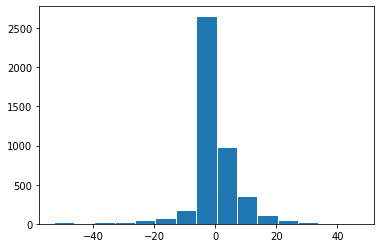

In [42]:
plt.hist(residuals,bins = 15, rwidth=.95)
    

In [43]:
mean_squared_error(y_test, preds) ** 0.5

6.575578587657615